In [1]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'D:\archive\data'

In [3]:
mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [4]:
folders = glob(r'D:\archive\data\*')
folders

['D:\\archive\\data\\1',
 'D:\\archive\\data\\2',
 'D:\\archive\\data\\3',
 'D:\\archive\\data\\4',
 'D:\\archive\\data\\5',
 'D:\\archive\\data\\6',
 'D:\\archive\\data\\7',
 'D:\\archive\\data\\8',
 'D:\\archive\\data\\9',
 'D:\\archive\\data\\A',
 'D:\\archive\\data\\B',
 'D:\\archive\\data\\C',
 'D:\\archive\\data\\D',
 'D:\\archive\\data\\E',
 'D:\\archive\\data\\F',
 'D:\\archive\\data\\G',
 'D:\\archive\\data\\H',
 'D:\\archive\\data\\I',
 'D:\\archive\\data\\J',
 'D:\\archive\\data\\K',
 'D:\\archive\\data\\L',
 'D:\\archive\\data\\M',
 'D:\\archive\\data\\N',
 'D:\\archive\\data\\O',
 'D:\\archive\\data\\P',
 'D:\\archive\\data\\Q',
 'D:\\archive\\data\\R',
 'D:\\archive\\data\\S',
 'D:\\archive\\data\\T',
 'D:\\archive\\data\\U',
 'D:\\archive\\data\\V',
 'D:\\archive\\data\\W',
 'D:\\archive\\data\\X',
 'D:\\archive\\data\\Y',
 'D:\\archive\\data\\Z']

In [5]:
x = Flatten()(mobilnet.output)


In [6]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)


In [7]:
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [8]:
from tensorflow.keras.layers import MaxPooling2D
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(35,activation="softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

#test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r'D:\archive\\data',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 42000 images belonging to 35 classes.


In [12]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  #validation_data=test_set,
  epochs=20,
  steps_per_epoch=100
  
)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 170s 2s/step - loss: 0.8052 - accuracy: 0.7944
Epoch 2/20
100/100 [==============================] - 163s 2s/step - loss: 0.0355 - accuracy: 0.9900
Epoch 3/20
100/100 [==============================] - 154s 2s/step - loss: 0.0241 - accuracy: 0.9922
Epoch 4/20
100/100 [==============================] - 150s 2s/step - loss: 0.0305 - accuracy: 0.9912
Epoch 5/20
100/100 [==============================] - 145s 1s/step - loss: 0.0245 - accuracy: 0.9934
Epoch 6/20
100/100 [==============================] - 125s 1s/step - loss: 0.0070 - accuracy: 0.9978
Epoch 7/20
100/100 [==============================] - 118s 1s/step - loss: 0.0108 - accuracy: 0.9962
Epoch 8/20
100/100 [==============================] - 115s 1s/step - loss: 0.0030 - accuracy: 0.9994
Epoch 9/20
100/100 [==============================] - 111s 1s/step - loss: 0.0185 - accuracy: 0.9941
Epoch 10/20
100

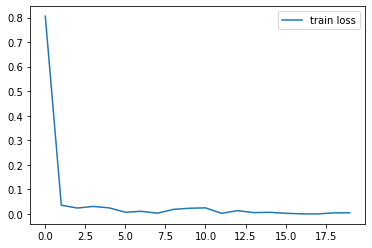

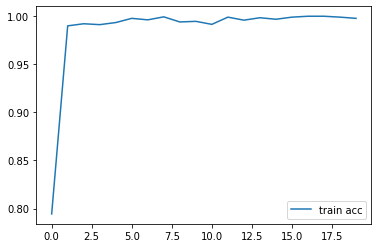

<Figure size 432x288 with 0 Axes>

In [13]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
#plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
#plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [30]:
path='D:/archive/data/6/125.jpg'

img=image.load_img(path,target_size=(224,224))
img=image.img_to_array(img)/255
img=np.array([img])
img.shape

(1, 224, 224, 3)

In [31]:
model.predict(img)

array([[1.5702715e-14, 8.1301463e-19, 8.7707356e-08, 4.9731660e-16,
        9.5039945e-16, 9.9999988e-01, 5.3141949e-11, 9.5523412e-15,
        6.1149992e-16, 1.1258649e-18, 2.1533881e-18, 8.4649430e-14,
        2.4392709e-14, 2.1682156e-19, 1.5033225e-13, 1.3299189e-15,
        5.9663055e-17, 6.4855816e-18, 1.9078990e-13, 6.1843087e-12,
        9.7499385e-20, 3.2335593e-12, 1.1565998e-12, 1.4544259e-14,
        3.2537153e-16, 6.7211895e-16, 2.0931106e-11, 3.3309039e-14,
        1.3532869e-14, 1.1791147e-12, 5.1948584e-10, 1.4793580e-13,
        1.1626974e-20, 4.4169700e-16, 5.5618476e-16]], dtype=float32)

In [32]:
a=np.argmax(model.predict(img), axis=1)

In [33]:
a

array([5], dtype=int64)